In [2]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import cv2

Using TensorFlow backend.


In [3]:
# load face detector and model
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
model = load_model("lenet.hdf5")

/Users/wei-deju/anaconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
from matplotlib import pyplot

def findFace(gray_img):
    rects = detector.detectMultiScale(gray_img, scaleFactor=1.1, 
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)
    n = len(rects)
    if n <= 0:
        print(" no face found!")
    else:
        print(" found {} faces".format(n))
    
    # loop over the face bounding boxes
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)    
    i = 0
    for (fX, fY, fW, fH) in rects:
        # extract the ROI of the face from the grayscale image,
        # resize it to a fixed 28x28 pixels, and then prepare the
        # ROI for classification via the CNN
        roi = gray_img[fY:fY + fH, fX:fX + fW]
        roi_img = cv2.resize(roi, (24, 24))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        i += 1
        axis = fig.add_subplot(1, 10, i, xticks=[], yticks=[])
        axis.imshow(roi_img)
        
    pyplot.bar( np.arange( 43 ), i, align='center' )
    pyplot.xlim([-1,  43])
    pyplot.show()    

 found 4 faces


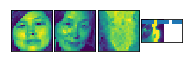

In [5]:
# read a test image in grayscale
image = cv2.imread('images/Test/test1.JPG', 0)
findFace(image)

 no face found!


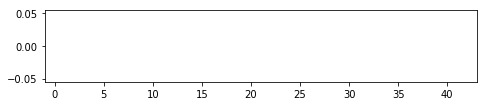

In [6]:
# read a test image in grayscale to find out faces (0)
image = cv2.imread('images/Test/IMG_7445.JPG', 0)
findFace(image)

 no face found!


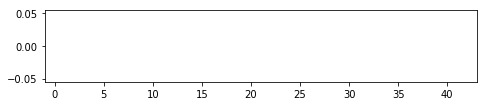

In [7]:
# read a test image in grayscale to find out faces (0)
image = cv2.imread('images/Test/IMG_7446.JPG', 0)
findFace(image)

 found 6 faces


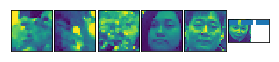

In [9]:
# read a test image in grayscale to find out others
image = cv2.imread('images/Test/IMG_8976.JPG', 0)
findFace(image)